<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [193]:
import pandas as pd

Load the dataset into a dataframe.


In [194]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [195]:
df.dropna(subset=["ConvertedComp"], axis=0, inplace=True)

C:\Users\PCM\AppData\Local\Temp\ipykernel_7964\1603446071.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist=False, color="b")


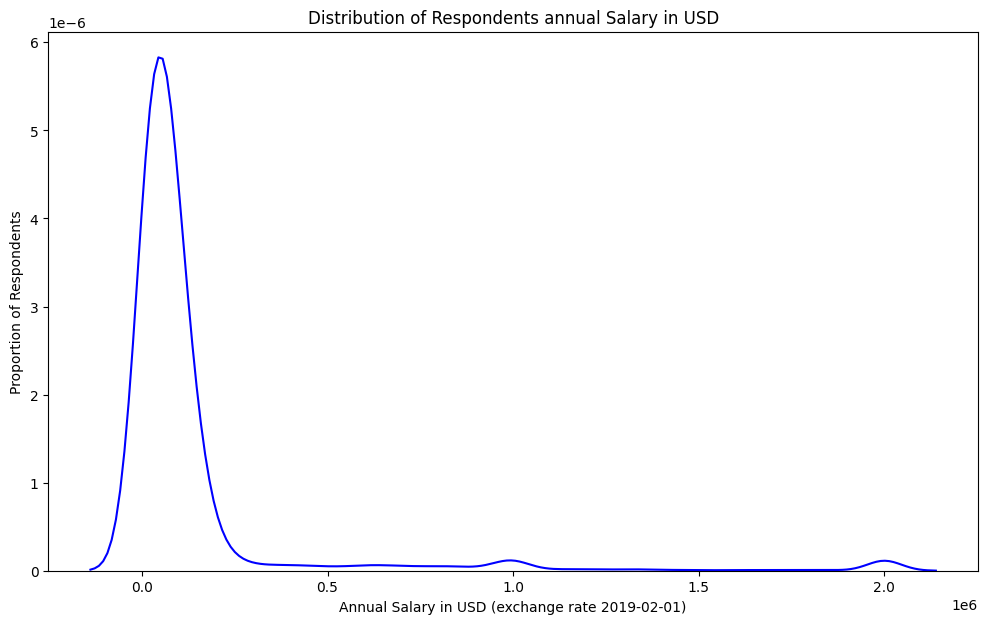

In [196]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(12, 7))

sns.distplot(df['ConvertedComp'], hist=False, color="b")

plt.title('Distribution of Respondents annual Salary in USD')
plt.xlabel('Annual Salary in USD (exchange rate 2019-02-01)')
plt.ylabel('Proportion of Respondents')

plt.show()
 


Plot the histogram for the column `ConvertedComp`.


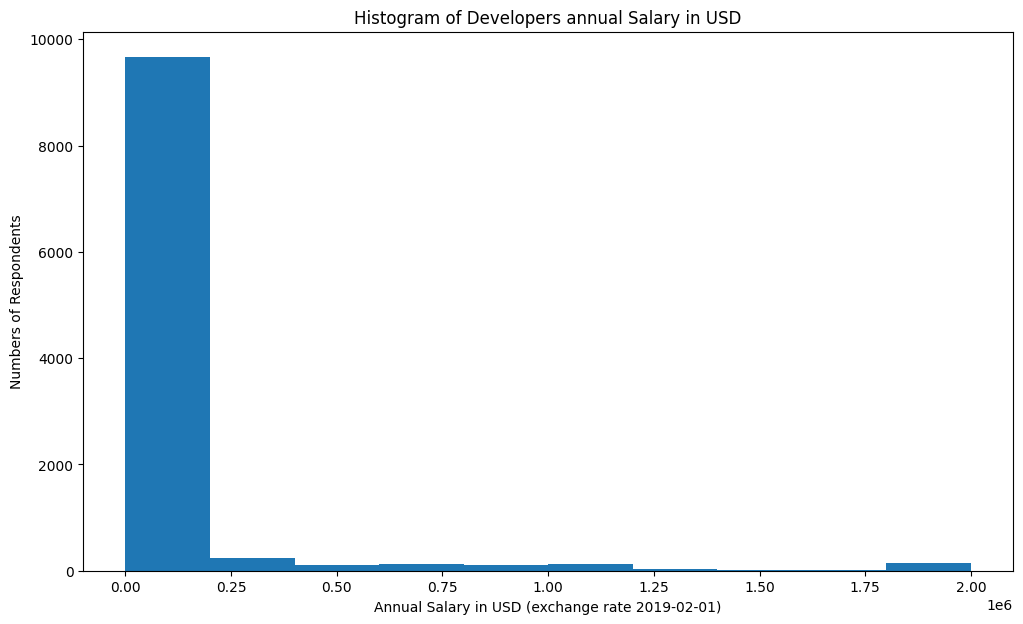

In [197]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', figsize=(12, 7))
plt.title('Histogram of Developers annual Salary in USD')
plt.xlabel('Annual Salary in USD (exchange rate 2019-02-01)')
plt.ylabel('Numbers of Respondents')
plt.show()

What is the median of the column `ConvertedComp`?


In [198]:
# your code goes here
df["ConvertedComp"].median()


57745.0

In [199]:
df["Age"].median()

29.0

How many responders identified themselves only as a **Man**?


In [200]:
# your code goes here
df["Gender"].value_counts()
df[df['Gender'] == 'Man'].shape[0]

9725

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [201]:
df['ConvertedComp'][df['Gender'] == 'Woman'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [202]:
# your code goes here
df.dropna(subset=["Age"], axis=0, inplace=True)
df["Age"].describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


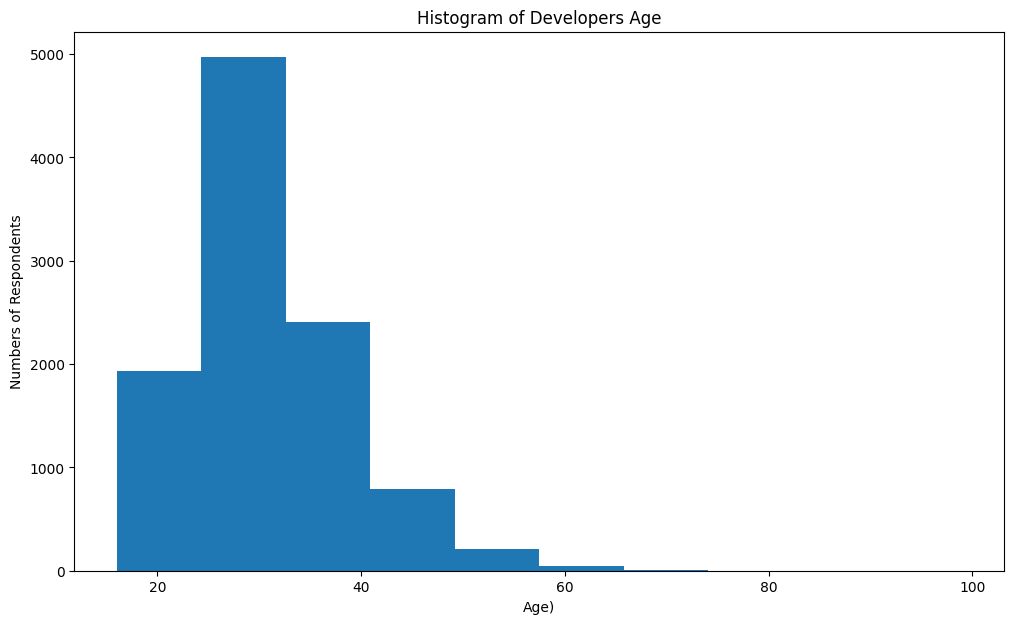

In [203]:
# your code goes here
df['Age'].plot(kind='hist', figsize=(12, 7))
plt.title('Histogram of Developers Age')
plt.xlabel('Age)')
plt.ylabel('Numbers of Respondents')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


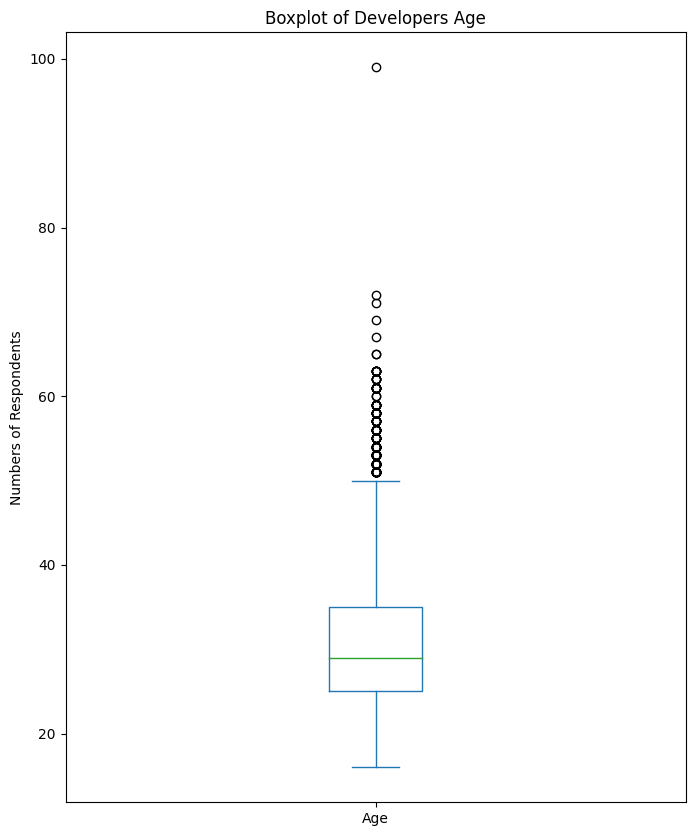

In [204]:
# your code goes here
df['Age'].plot(kind='box', figsize=(8, 10))
plt.title('Boxplot of Developers Age')

plt.ylabel('Numbers of Respondents')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [207]:
df['ConvertedComp'].describe()

count    1.035400e+04
mean     1.313593e+05
std      2.939787e+05
min      0.000000e+00
25%      2.683450e+04
50%      5.760000e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [208]:
# your code goes here
IQR = df['ConvertedComp'].describe()[6] - df['ConvertedComp'].describe()[4]
print(IQR)

73165.5


Find out the upper and lower bounds.


In [209]:
# your code goes here
IQR_V = 1.5 * IQR
lower_bound = df['ConvertedComp'].describe()[4] - IQR_V
upper_bound = df['ConvertedComp'].describe()[6] + IQR_V
print("Lower bound is:" , lower_bound)
print("Upper bound is:" , upper_bound)


Lower bound is: -82913.75
Upper bound is: 209748.25


Identify how many outliers are there in the `ConvertedComp` column.


In [213]:
# your code goes here
len(df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)])

861

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [215]:
# your code goes here
df2= df[(df['ConvertedComp']>lower_bound)&(df['ConvertedComp']<upper_bound)]
df2['ConvertedComp'].describe()

count      9493.000000
mean      59740.170441
std       43334.404562
min           0.000000
25%       24060.000000
50%       52356.000000
75%       85051.000000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [217]:
df2.corr()['Age']

C:\Users\PCM\AppData\Local\Temp\ipykernel_7964\3096548149.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['Age']


Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

C:\Users\PCM\AppData\Local\Temp\ipykernel_7964\3216999830.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


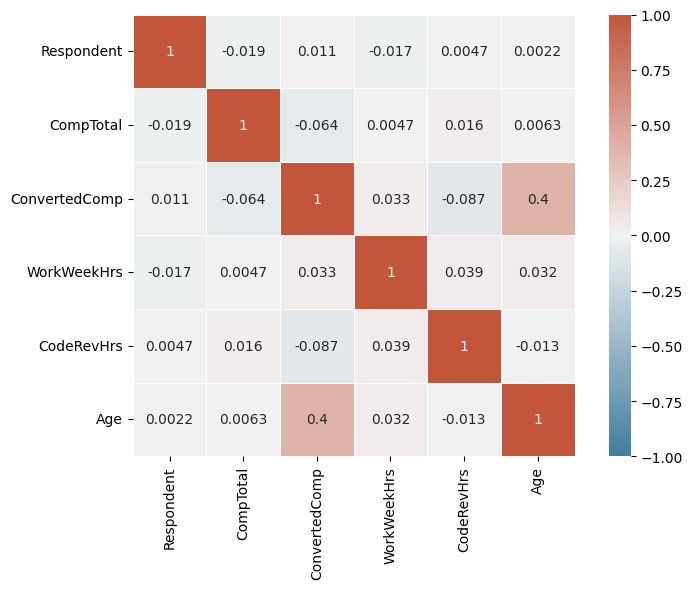

In [161]:
# your code goes here
import seaborn as sns
corr = df2.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap=cmap, annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
